In [5]:
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [6]:
trainingDataSet = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testingDataSet = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [7]:
# Randomly shuffle labels
randomLabelsTrain = torch.tensor(np.random.randint(0,10, (len(trainingDataSet)),))
trainingDataSet.targets = randomLabelsTrain
randomLabelsTest = torch.tensor(np.random.randint(0,10, (len(testingDataSet)),))
testingDataSet.targets = randomLabelsTest

# Prep data for training and testing
train = torch.utils.data.DataLoader(trainingDataSet, batch_size=25, shuffle=True)
test = torch.utils.data.DataLoader(testingDataSet, batch_size=25, shuffle=True)

In [8]:
class randomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 545)
        self.fc2 = nn.Linear(545, 190)
        self.fc3 = nn.Linear(190, 15)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [9]:
model1 = randomModel()
summary(model1,(28*28,))
lossFunc = nn.CrossEntropyLoss()
opt = optim.Adam(model1.parameters(), lr=0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 545]         427,825
            Linear-2                  [-1, 190]         103,740
            Linear-3                   [-1, 15]           2,865
Total params: 534,430
Trainable params: 534,430
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.04
Estimated Total Size (MB): 2.05
----------------------------------------------------------------


In [10]:
# Train Random Label neural networks, Calculate accuracy for training and testing in each epoch
EPOCHS = 30
counter = 0
counterList = []
costList = []
testLossList = []
trainLossList = []
for index in range(EPOCHS):
    counterList.append(counter)
    counter += 1
    # Train model
    for batch in train:
        inputImages, actual = batch
        model1.zero_grad()
        output = model1(inputImages.view(-1,784))
        cost = lossFunc(output, actual)
        cost.backward()
        opt.step()
    costList.append(cost.detach().numpy())
    
    # Calculate cost on training data
    trainTotal = 0
    trainCounter = 0
    for batch in train: 
        inputImages, actual = batch
        output = model1(inputImages.view(-1,784))
        cost = lossFunc(output, actual)
        trainTotal += cost
        trainCounter += 1
    trainTotal = trainTotal / trainCounter
    trainLossList.append(trainTotal.detach().numpy())
    
    # Calculate cost on test data
    testTotal = 0
    testCounter = 0
    for batch in test: 
        inputImages, actual = batch
        output = model1(inputImages.view(-1,784))
        cost = lossFunc(output, actual)
        testTotal += cost
        testCounter += 1
    testTotal = testTotal / testCounter
    testLossList.append(testTotal.detach().numpy())

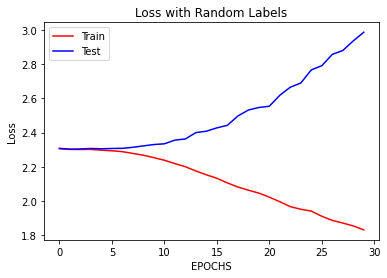

In [15]:
plt.plot(counterList, trainLossList, 'r', label='Train')
plt.plot(counterList, testLossList, 'b', label='Test')
plt.title("Loss with Random Labels")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()